# Machine Learning Project on Data-Related Professions and Their Salaries

### Participated Students

- Ecem Erdoğan
- Serkan İşleyen

In [1]:
!pip install squarify
!pip install xgboost

In [2]:
#Essential libraries
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

#Models & Probabilistic Metrics
from sklearn.linear_model import LinearRegression
import xgboost
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")

import sklearn
sklearn.set_config(transform_output="pandas")

## Data Set Introduction

- Give some technical information or a brief story about the data set you used in this project which will motivate the reader.
- Introduce your data set and variables in detail here (for example, you may have numerical, nominal, ordinal features along with possible missing values etc). 
- Please do not forget to give the reference of the place where you obtained the data set from.

## Data Scientist Salaries Dataset

- This dataset gives information about the salary information of data scientist in the 2020-2025 years range. The location and size of the company where a data scientist works, type of work, proportion of remote work, experience level, the title of his/her position, primary place of residence, the year of receipt of salary information are addressed under the 10 features filled with both numerical and categorical data.


- The details about features and required explanations to understand the values better is given under the title of "Content of the Data Set".

## Content of the Dataset

<table style="border-collapse: collapse; width: 100%; font-family: Arial, sans-serif; text-align: left;">
    <thead>
        <tr >
            <th style="padding: 10px; border: 1px solid #ddd;">Feature</th>
            <th style="padding: 10px; border: 1px solid #ddd;">Description</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="padding: 10px; border: 1px solid #ddd;">work_year</td>
            <td style="padding: 10px; border: 1px solid #ddd;">The year the salary was paid.</td>
        </tr>
        <tr>
            <td style="padding: 10px; border: 1px solid #ddd;">experience_level</td>
            <td style="padding: 10px; border: 1px solid #ddd;">
                The experience level in the job during the year with the following possible values:
                <ul>
                    <li>EN - Entry-level / Junior</li>
                    <li>MI - Mid-level / Intermediate</li>
                    <li>SE - Senior-level / Expert</li>
                    <li>EX - Executive-level / Director</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td style="padding: 10px; border: 1px solid #ddd;">employment_type</td>
            <td style="padding: 10px; border: 1px solid #ddd;">
                The type of employment for the role:
                <ul>
                    <li>PT - Part-time</li>
                    <li>FT - Full-time</li>
                    <li>CT - Contract</li>
                    <li>FL - Freelance</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td style="padding: 10px; border: 1px solid #ddd;">job_title</td>
            <td style="padding: 10px; border: 1px solid #ddd;">The role worked in during the year.</td>
        </tr>
        <tr>
            <td style="padding: 10px; border: 1px solid #ddd;">salary</td>
            <td style="padding: 10px; border: 1px solid #ddd;">The total gross salary amount paid.</td>
        </tr>
        <tr>
            <td style="padding: 10px; border: 1px solid #ddd;">salary_currency</td>
            <td style="padding: 10px; border: 1px solid #ddd;">The currency of the salary paid as an ISO 4217 currency code.</td>
        </tr>
        <tr>
            <td style="padding: 10px; border: 1px solid #ddd;">salary_in_usd</td>
            <td style="padding: 10px; border: 1px solid #ddd;">
                The salary in USD (FX rate divided by avg. USD rate of respective year) via statistical data from the BIS and central banks.
            </td>
        </tr>
        <tr>
            <td style="padding: 10px; border: 1px solid #ddd;">employee_residence</td>
            <td style="padding: 10px; border: 1px solid #ddd;">
                Employee's primary country of residence during the work year as an ISO 3166 country code.
            </td>
        </tr>
        <tr>
            <td style="padding: 10px; border: 1px solid #ddd;">remote_ratio</td>
            <td style="padding: 10px; border: 1px solid #ddd;">
                The overall amount of work done remotely, possible values are as follows:
                <ul>
                    <li>0 - No remote work (less than 20%)</li>
                    <li>50 - Partially remote (20-80%)</li>
                    <li>100 - Fully remote (more than 80%)</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td style="padding: 10px; border: 1px solid #ddd;">company_location</td>
            <td style="padding: 10px; border: 1px solid #ddd;">
                The country of the employer's main office or contracting branch as an ISO 3166 country code.
            </td>
        </tr>
        <tr>
            <td style="padding: 10px; border: 1px solid #ddd;">company_size</td>
            <td style="padding: 10px; border: 1px solid #ddd;">
                The average number of people that worked for the company during the year:
                <ul>
                    <li>S - Less than 50 employees (small)</li>
                    <li>M - 50 to 250 employees (medium)</li>
                    <li>L - More than 250 employees (large)</li>
                </ul>
            </td>
        </tr>
    </tbody>
</table>






## Description of the Problem

- Tell us about the possible questions you are interested in this data set. 
  - You may want to build a regression model to predict a continuous variable based on a set of features and try to find a good model for this data set by fitting several different models and comparing the performance of the models on this data set.
  - You may want to build a classfier to predict a binary/multi-class variable based on a set of features and try to find a good model for this data set by fitting several different classifiers and comparing the performance of the models on this data set.
  - You may have high-dimensional features (too many features) and want to reduce the dimension of features prior to model building etc.

In this problem, we will try to estimate how much a data scientist will be paid when his/her profile is shared with us by giving information about the features in the data set based on the data gather from 2020-2025 years. To do that, we will build a regression model to predict the value of the salary information in USD currency.

In [3]:
df = pd.read_csv('datasets/data_scientist_salaries.csv',index_col=0)
df.reset_index(inplace=True)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Data Engineer,90000,GBP,113924,GB,0,GB,M
1,2025,EX,FT,Data Engineer,80000,GBP,101265,GB,0,GB,M
2,2025,MI,FT,Data Scientist,90000,GBP,113924,GB,0,GB,M
3,2025,MI,FT,Data Scientist,60000,GBP,75949,GB,0,GB,M
4,2025,MI,FT,Data Scientist,100000,GBP,126582,GB,0,GB,M
...,...,...,...,...,...,...,...,...,...,...,...
73982,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
73983,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
73984,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
73985,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73987 entries, 0 to 73986
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           73987 non-null  int64 
 1   experience_level    73987 non-null  object
 2   employment_type     73987 non-null  object
 3   job_title           73987 non-null  object
 4   salary              73987 non-null  int64 
 5   salary_currency     73987 non-null  object
 6   salary_in_usd       73987 non-null  int64 
 7   employee_residence  73987 non-null  object
 8   remote_ratio        73987 non-null  int64 
 9   company_location    73987 non-null  object
 10  company_size        73987 non-null  object
dtypes: int64(4), object(7)
memory usage: 6.2+ MB


- The types of the features shows us that the categorical data dominates the data set rather than numerical features.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,73987.0,2023.844446,0.490699,2020.0,2024.0,2024.0,2024.0,2025.0
salary,73987.0,162591.043359,192231.157260,14000.0,106800.0,148000.0,200000.0,30400000.0
salary_in_usd,73987.0,158026.766770,72589.972877,15000.0,106800.0,147500.0,199700.0,800000.0
remote_ratio,73987.0,21.572709,41.016040,0.0,0.0,0.0,0.0,100.0


## Data Exploration
- Tell us about the descriptive approaches you have done to explore your data set.
   - Some basic descriptive statistics
   - Some visualizations that will open a door/insight for your questions.
- Please, whenever you present a result/visualization here, interpret it. If you are not planning to interpret it, do not include it here either.

### 1. Categorical Feature Exploration

In [6]:
# Identify categorical columns.
categorical_columns = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']

# Display unique values and their counts for each categorical column
for col in categorical_columns:
    print(f"Feature: {col}")
    print(df[col].value_counts())
    print("\n")

Feature: experience_level
experience_level
SE    43402
MI    22106
EN     6959
EX     1520
Name: count, dtype: int64


Feature: employment_type
employment_type
FT    73637
PT      179
CT      155
FL       16
Name: count, dtype: int64


Feature: job_title
job_title
Data Scientist                  11561
Data Engineer                    9483
Software Engineer                7894
Data Analyst                     7379
Machine Learning Engineer        5837
                                ...  
CRM Data Analyst                    1
Backend Software Engineer           1
Marketing Data Scientist            1
AI Machine Learning Engineer        1
Machine Learning Engineer 5         1
Name: count, Length: 290, dtype: int64


Feature: employee_residence
employee_residence
US    66728
CA     2549
GB     2155
AU      240
DE      226
      ...  
BM        1
RW        1
UG        1
AD        1
JE        1
Name: count, Length: 93, dtype: int64


Feature: company_location
company_location
US    66781
CA

- When we look at the data set, it is clear that the dataset is filled with lots of categorical features. There is only a numerical feature named work_year and remote_ratio.

### For better visualization:

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 20px;
        }
        h2 {
            color: #333;
        }
        table {
            width: 100%;
            border-collapse: collapse;
            margin-bottom: 20px;
        }
        th, td {
            border: 1px solid #ddd;
            padding: 8px;
            text-align: left;
        }
        th {
            background-color: #f2f2f2;
            font-weight: bold;
        }
        tr:nth-child(even) {
            background-color: #f9f9f9;
        }
        tr:hover {
            background-color: #f1f1f1;
        }
    </style>
</head>
<body>

<table>
    <thead>
        <tr>
            <th>Experience Level</th>
            <th>Count</th>
        </tr>
    </thead>
    <tbody>
        <tr><td>SE</td><td>42538</td></tr>
        <tr><td>MI</td><td>21655</td></tr>
        <tr><td>EN</td><td>6793</td></tr>
        <tr><td>EX</td><td>1490</td></tr>
    </tbody>
</table>

<table>
    <thead>
        <tr>
            <th>Employment Type</th>
            <th>Count</th>
        </tr>
    </thead>
    <tbody>
        <tr><td>FT</td><td>72138</td></tr>
        <tr><td>PT</td><td>173</td></tr>
        <tr><td>CT</td><td>149</td></tr>
        <tr><td>FL</td><td>16</td></tr>
    </tbody>
</table>

<table>
    <thead>
        <tr>
            <th>Job Title</th>
            <th>Count</th>
        </tr>
    </thead>
    <tbody>
        <tr><td>Data Scientist</td><td>11367</td></tr>
        <tr><td>Data Engineer</td><td>9361</td></tr>
        <tr><td>Software Engineer</td><td>7736</td></tr>
        <tr><td>Data Analyst</td><td>7246</td></tr>
        <tr><td>Machine Learning Engineer</td><td>5781</td></tr>
        <tr><td>... (283 more)</td><td></td></tr>
    </tbody>
</table>

<table>
    <thead>
        <tr>
            <th>Employee Residence</th>
            <th>Count</th>
        </tr>
    </thead>
    <tbody>
        <tr><td>US</td><td>65376</td></tr>
        <tr><td>CA</td><td>2493</td></tr>
        <tr><td>GB</td><td>2111</td></tr>
        <tr><td>AU</td><td>234</td></tr>
        <tr><td>DE</td><td>220</td></tr>
        <tr><td>... (88 more)</td><td></td></tr>
    </tbody>
</table>

<table>
    <thead>
        <tr>
            <th>Company Location</th>
            <th>Count</th>
        </tr>
    </thead>
    <tbody>
        <tr><td>US</td><td>65429</td></tr>
        <tr><td>CA</td><td>2495</td></tr>
        <tr><td>GB</td><td>2119</td></tr>
        <tr><td>AU</td><td>238</td></tr>
        <tr><td>DE</td><td>228</td></tr>
        <tr><td>... (81 more)</td><td></td></tr>
    </tbody>
</table>

<table>
    <thead>
        <tr>
            <th>Company Size</th>
            <th>Count</th>
        </tr>
    </thead>
    <tbody>
        <tr><td>M</td><td>69886</td></tr>
        <tr><td>L</td><td>2385</td></tr>
        <tr><td>S</td><td>205</td></tr>
    </tbody>
</table>

</body>
</html>

### 2. Checking the null values.

In [7]:
total = df.isnull().sum().sort_values(ascending = False)
print("Null values in the features:\n{}".format(total))

Null values in the features:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


### 3. Distributions of the Features in the data set.

#### Distribution of the Experience Level

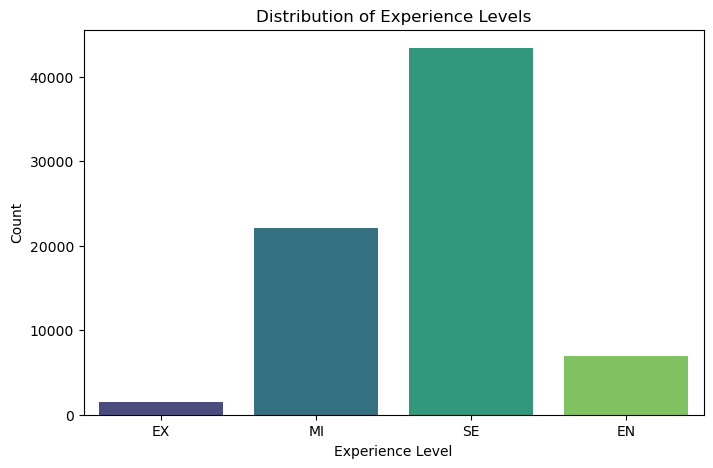

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='experience_level', hue='experience_level', palette='viridis', dodge=False, legend=False)
plt.title('Distribution of Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.show()

As seen in the table, the experience level of the majority of our data is senior.

#### Distribution of the Type of Employment

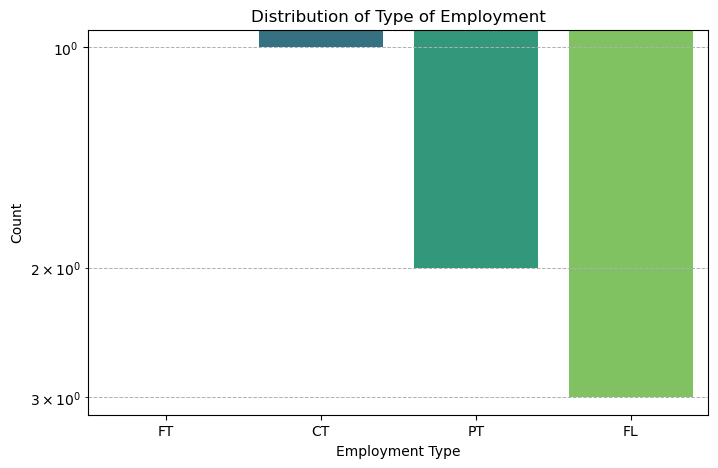

In [9]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='employment_type', y = df['employment_type'], hue='employment_type', palette='viridis', dodge=False, legend=False)

# Set logarithmic scale on the y-axis
plt.yscale('log')
plt.title('Distribution of Type of Employment')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.grid(axis='y', which='both', linestyle='--', linewidth=0.7)

plt.show()

- It seems that companies generally focus on the full-time type of work.
- The low proportion of freelance (FL) or contract (CT) employees may indicate that such business models are less preferred in the business world.

#### Distribution of the Top 10 Job Titles

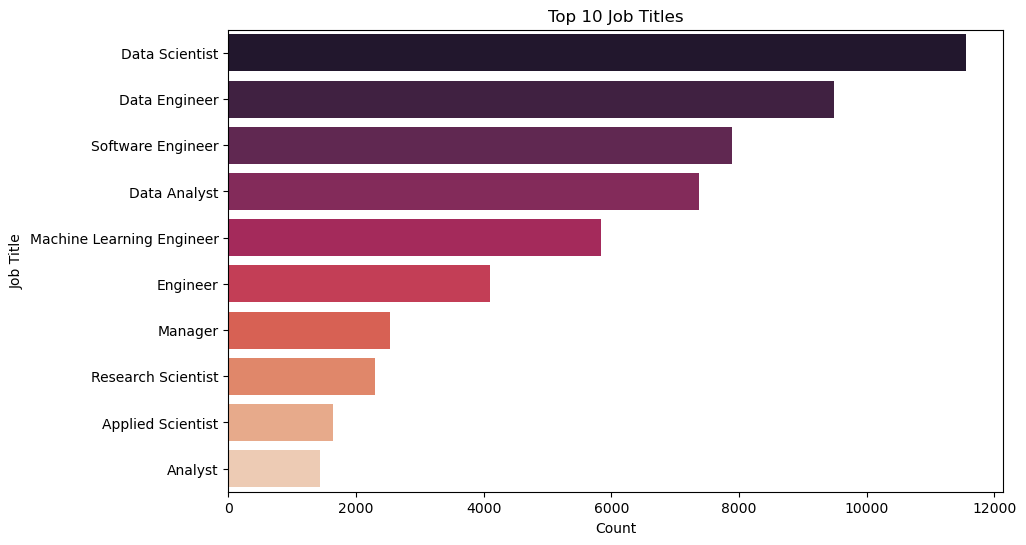

In [10]:
# Get the top 10 job titles by count
top_jobs = df['job_title'].value_counts().head(10)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_jobs.values,
    y=top_jobs.index,
    hue=top_jobs.index,  
    dodge=False,
    palette='rocket',  
    legend=False  
)
plt.title('Top 10 Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()


- Data Scientist is the most popular job title, followed by "Data Engineer" and "Software Engineer".
  
- It is obvious that there are lots of different roles and positions for a person who wants to work in a data-related field. 

#### Distribution of the Residence of the Employees

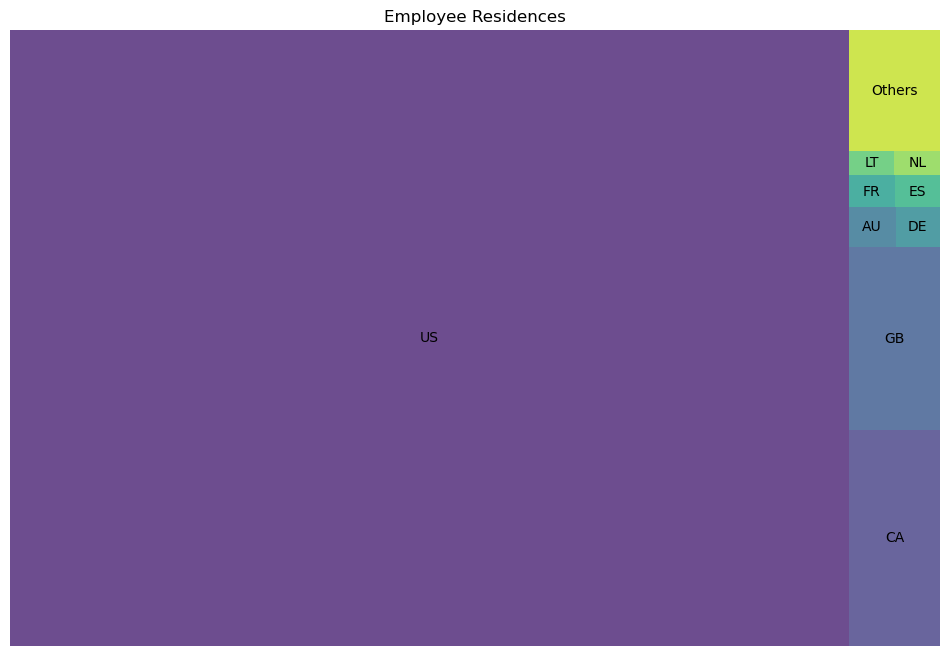

In [11]:
# Get the top 10 employee residences
top_residences = df['employee_residence'].value_counts().head(9)

# Sum the remaining residences as "Others"
others_sum = df['employee_residence'].value_counts().iloc[9:].sum()

# Add "Others" as a new row
top_residences['Others'] = others_sum

# Create the treemap
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=top_residences.values,  
    label=top_residences.index,   
    alpha=0.8,                   
    color=sns.color_palette('viridis', len(top_residences))  
)
plt.title('Employee Residences')
plt.axis('off') 
plt.show()

- Most companies are based in the US or prefer US employees.
  
- European countries and other regions have fewer employees, which may indicate a regional focus. This may be the case in that the dataset itself was created mostly with data submitted by American citizens working in data-related professions.

#### Distribution of the Company Locations

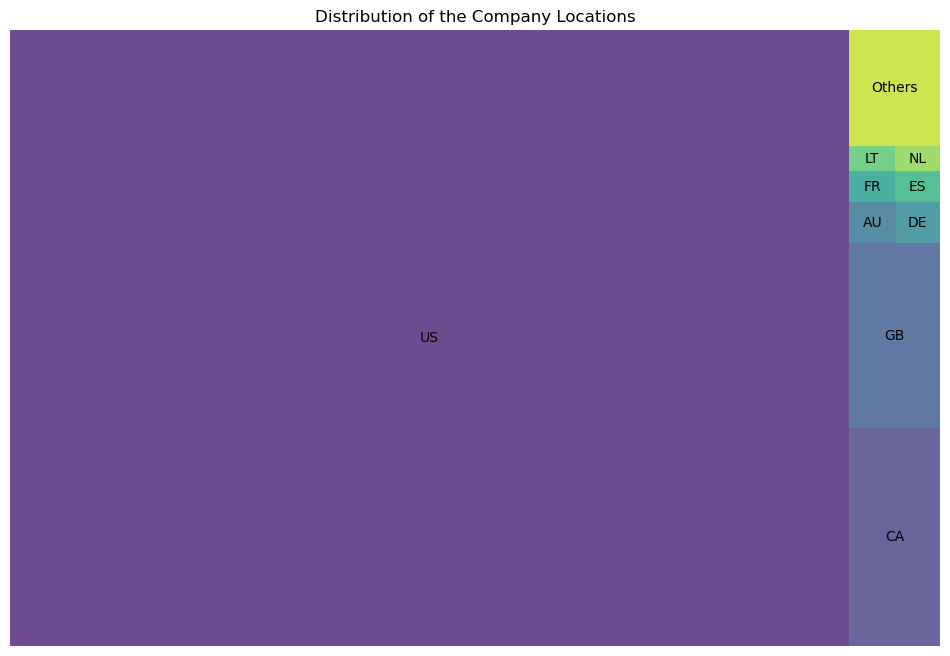

In [12]:
# Get the top 10 employee residences
top_company_locations = df['company_location'].value_counts().head(9)

# Sum the remaining residences as "Others"
others_sum = df['company_location'].value_counts().iloc[9:].sum()

# Add "Others" as a new row
top_company_locations['Others'] = others_sum

plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=top_company_locations.values,  
    label=top_company_locations.index,   
    alpha=0.8,                    
    color=sns.color_palette('viridis', len(top_company_locations)) 
)
plt.title('Distribution of the Company Locations')
plt.axis('off')  
plt.show()

- A similar situation to the employee residence table applies here. Employees generally work in companies in the country they reside in.

#### Salary Distribution

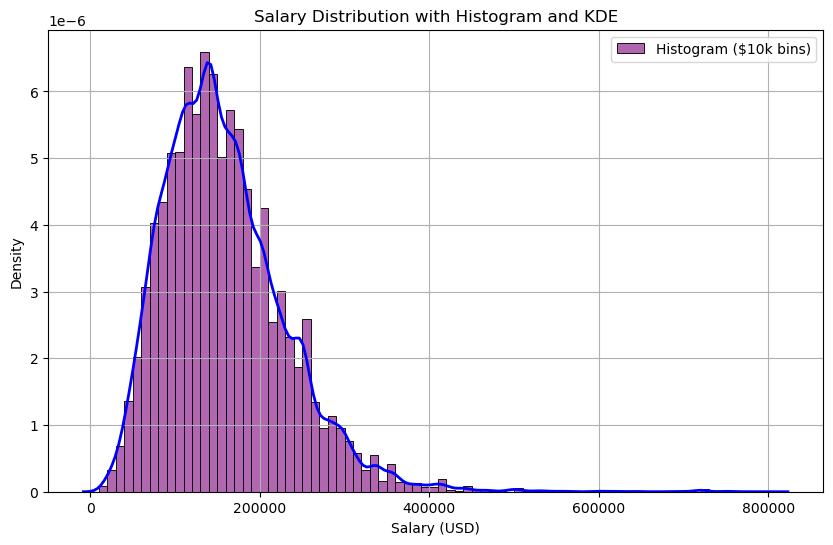

In [13]:
plt.figure(figsize=(10, 6))

sns.histplot(
    df['salary_in_usd'],
    bins=range(0, int(df['salary_in_usd'].max()) + 10000, 10000),  # Bins of $10,000 
    kde=False,
    stat='density',  
    color="purple",
    alpha=0.6,
    label='Histogram ($10k bins)'
)

sns.kdeplot(
    df['salary_in_usd'],
    fill=False,  
    color="blue",
    linewidth=2, 
)

plt.title('Salary Distribution with Histogram and KDE')
plt.xlabel('Salary (USD)')
plt.ylabel('Density')
plt.legend()  

plt.grid(True)

# Show the plot
plt.show()

- As we see in the salary distribution histogram, it is obvious that salaries higher than 400000 dollars are outliers that prevent our data set from showing the features of normal distribution. Because of that, we will remove the part of higher than $400000 salaries from the data set while preparing the data before modeling.

### 4. Relationships between Features and the Target value, Salary

#### The Relationship of Employment Type and Salary.

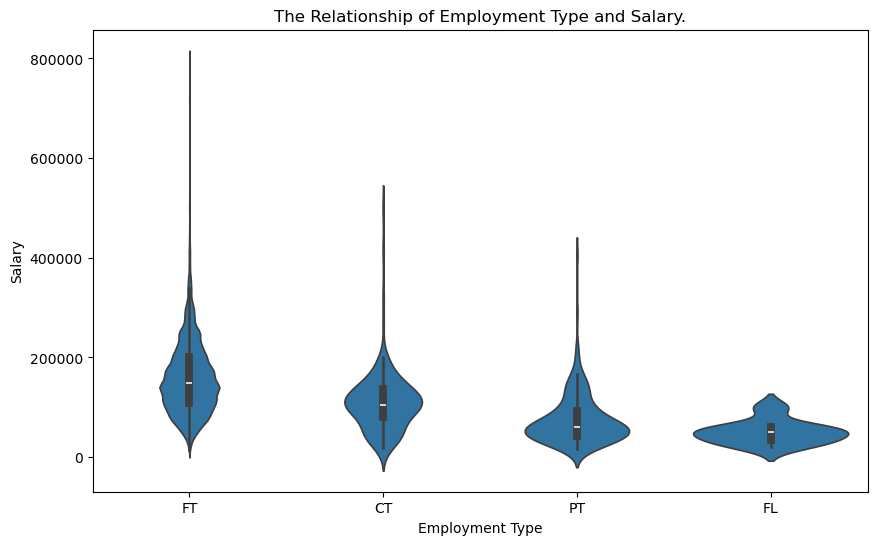

In [14]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='employment_type', y='salary_in_usd', data=df)
plt.xlabel('Employment Type')
plt.ylabel('Salary')
plt.title('The Relationship of Employment Type and Salary.')
plt.show()

- Freelancers and part-time workers receive lower salaries than other employees.

#### The Relationship of Experience Level and Salary.

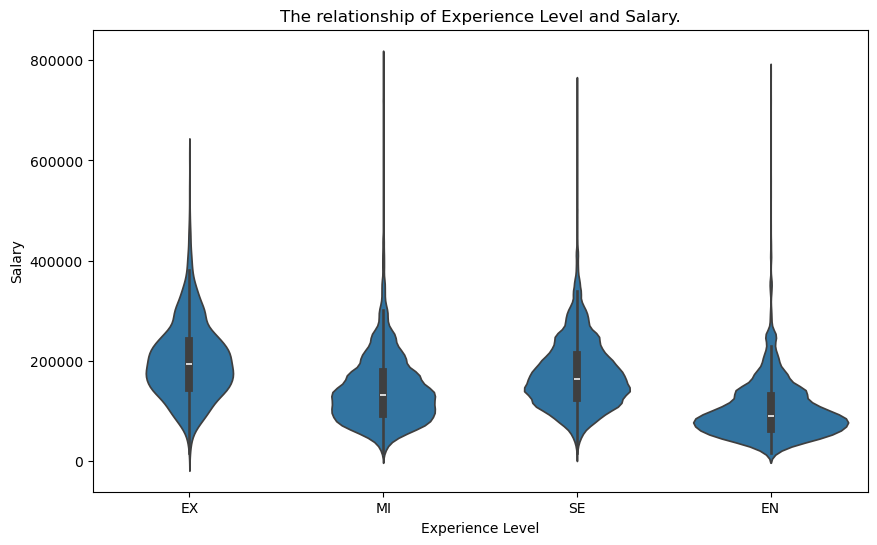

In [15]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='experience_level', y='salary_in_usd', data=df)
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.title('The relationship of Experience Level and Salary.')
plt.show()

- There are differences in salaries based on experience level. As experience level increases, salary increases. This difference is most noticeable at the junior level.

#### The Relationship of Remote Ratio and Salary.

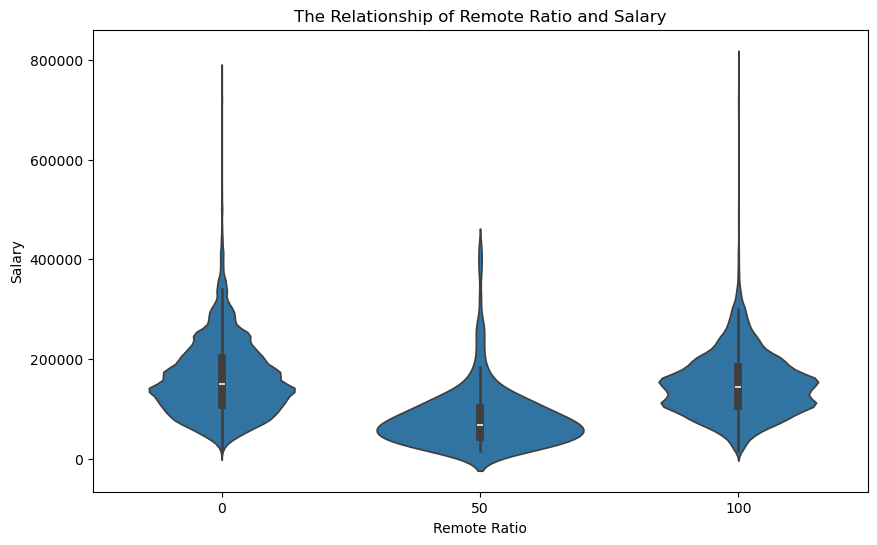

In [16]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='remote_ratio', y='salary_in_usd', data=df)
plt.xlabel('Remote Ratio')
plt.ylabel('Salary')
plt.title('The Relationship of Remote Ratio and Salary')
plt.show()

- There is an interesting situation here. There is no direct proportion between the rate of remote work and the salary. People who work less than 20% and more than 80% from the office earn more than those in between.

#### The Relationship of Company Size and Salary.

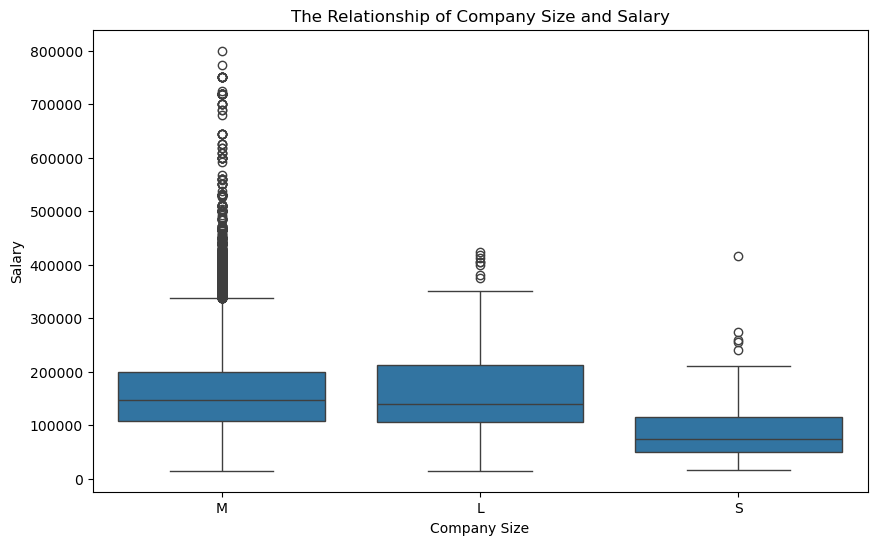

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='company_size', y='salary_in_usd', data=df)
plt.xlabel('Company Size')
plt.ylabel('Salary')
plt.title('The Relationship of Company Size and Salary')
plt.show()

- There is little difference in the effect of company size on salaries between medium and large companies, but small companies pay significantly less.

#### The Relationship of Company Location and Salary.

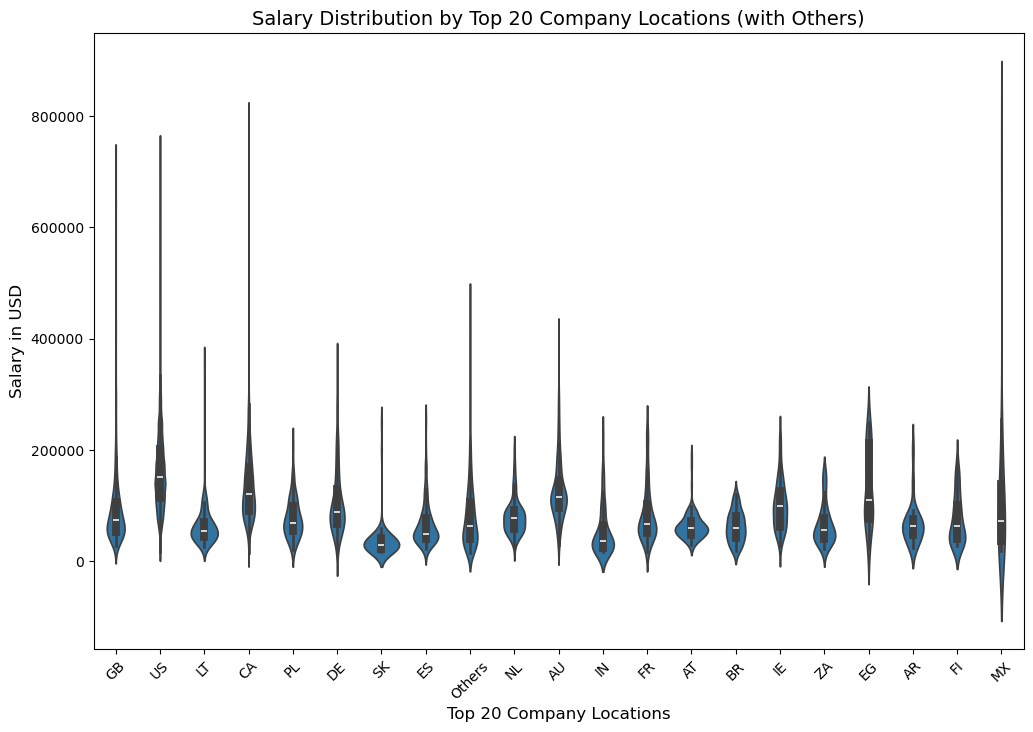

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Take the top 20 locations and group the rest of them as others.
top_locations = df['company_location'].value_counts().head(20).index
filtered_df = df.copy()
filtered_df['company_location_grouped'] = df['company_location'].apply(
    lambda x: x if x in top_locations else 'Others'
)

plt.figure(figsize=(12, 8))

# Violin plotting
sns.violinplot(x='company_location_grouped', y='salary_in_usd', data=filtered_df)

plt.xlabel('Top 20 Company Locations', fontsize=12)
plt.ylabel('Salary in USD', fontsize=12)
plt.title('Salary Distribution by Top 20 Company Locations (with Others)', fontsize=14)

plt.xticks(rotation=45)

plt.show()


- Companies based in the United States (US) have the widest salary ranges.

- The US appears to be the region with the most competitive salaries in data-focused industries. This result can be originated from regional economic differences that may affect salary ranges.

#### The Relationship of Job Titles and Salary.

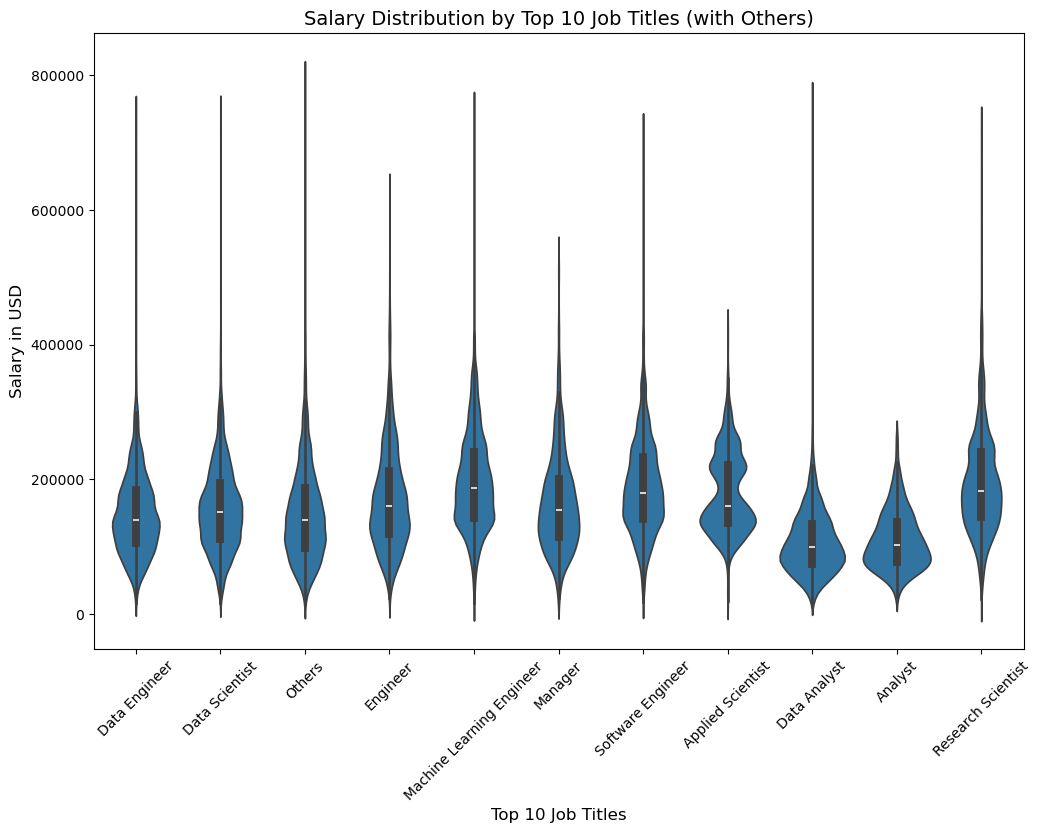

In [19]:
# Take the top 10 job titles and group the rest of them as others.
top_job_titles = df['job_title'].value_counts().head(10).index
filtered_df['job_title_grouped'] = df['job_title'].apply(
    lambda x: x if x in top_job_titles else 'Others'
)
plt.figure(figsize=(12, 8))

# Violin plotting
sns.violinplot(x='job_title_grouped', y='salary_in_usd', data=filtered_df)

plt.xlabel('Top 10 Job Titles', fontsize=12)
plt.ylabel('Salary in USD', fontsize=12)
plt.title('Salary Distribution by Top 10 Job Titles (with Others)', fontsize=14)

plt.xticks(rotation=45)

plt.show()


- As can be seen from the graph, the average salary in some branches is lower than in other branches. However, there are significant differences within each branch.

#### The Relationship of Years and Salary.

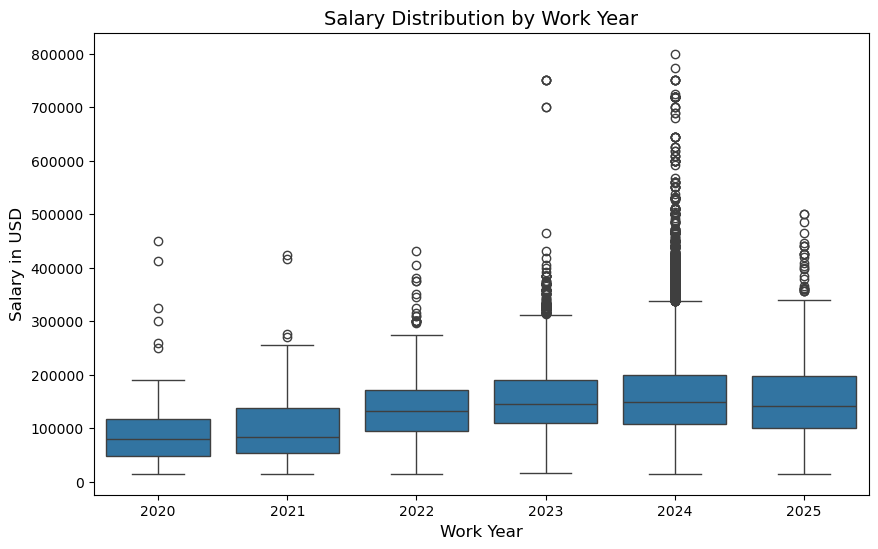

In [20]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='work_year', y='salary_in_usd', data=df)

plt.xlabel('Work Year', fontsize=12)
plt.ylabel('Salary in USD', fontsize=12)
plt.title('Salary Distribution by Work Year', fontsize=14)

plt.show()


- A gradual increase in salary levels has been observed over the years.

- The work year 2024 stands out as having a wider salary distribution. This can be raised from the following:
    - In 2024, economic growth or inflation may have caused higher salaries for top jobs and smaller increases for lower jobs, leading to a wider salary range.
    - In 2024, economic uncertainty might have caused some companies to cut salaries while offering higher pay for key roles, leading to a wider salary range.
    - Significantly higher salary demands are emerging for specialized job titles, while salaries for non-technical roles may be holding steady. This will be a result of the wider salary range.

#### The Relationship of Employee Residence and Salary plot

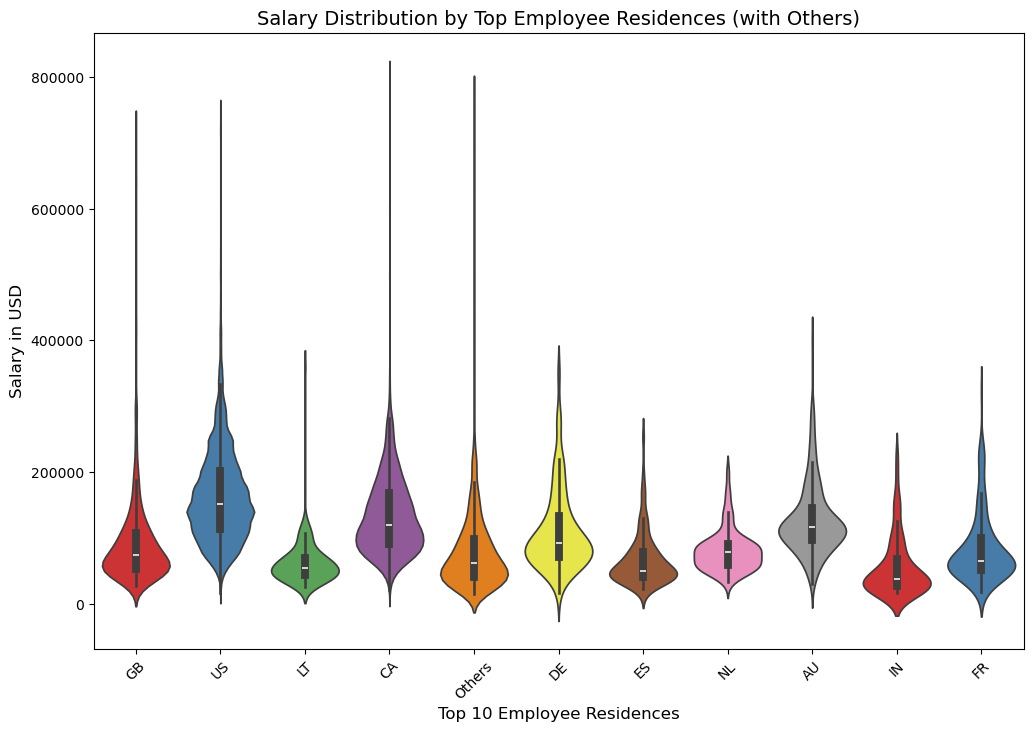

In [21]:
# Take the top 10 residences and group the rest of them as others.
top_residences = df['employee_residence'].value_counts().head(10).index
filtered_df['residence_grouped'] = filtered_df['employee_residence'].apply(
    lambda x: x if x in top_residences else 'Others'
)

plt.figure(figsize=(12, 8))

#vİOLİN PLOTTİNG
sns.violinplot(x='residence_grouped', y='salary_in_usd', data=filtered_df, palette="Set1")

plt.xlabel('Top 10 Employee Residences', fontsize=12)
plt.ylabel('Salary in USD', fontsize=12)
plt.title('Salary Distribution by Top Employee Residences (with Others)', fontsize=14)

plt.xticks(rotation=45)

plt.show()


- As can be seen from the graph, there are significant salary differences between countries. The USA pays higher salaries than other countries. (Countries with less data are shown as if they were a single country).

## Methodologies

- Tell us about data pre-processing approaches you have done (if you have done any).
- Tells us about the methodologies you have done to find answer to your research problems defined above.

## Feature Engineering

### 1. Missing Data
Our dataset does not contain any missing data.

### 2. Removal of Unnecessary Data
Since the salary information has already given in dollar exchange rate, we remove the related but not required columns named salary currency and salary.

In [22]:
df = df.drop(columns=['salary_currency','salary'])
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Data Engineer,113924,GB,0,GB,M
1,2025,EX,FT,Data Engineer,101265,GB,0,GB,M
2,2025,MI,FT,Data Scientist,113924,GB,0,GB,M
3,2025,MI,FT,Data Scientist,75949,GB,0,GB,M
4,2025,MI,FT,Data Scientist,126582,GB,0,GB,M
...,...,...,...,...,...,...,...,...,...
73982,2020,SE,FT,Data Scientist,412000,US,100,US,L
73983,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
73984,2020,EN,FT,Data Scientist,105000,US,100,US,S
73985,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


### 3. Outlier Analysis

- We remove rows larger than 400000 dollars under the name salary_in_usd, which is the selected target value. This step was decided by looking at the distribution of the target value. In order for our target value to have a normal distribution, we set $400,000 as the threshold value and removed the values above the threshold from our dataset, considering them as outliers.


In [23]:
max_salary=df["salary_in_usd"].max()
min_salary=df["salary_in_usd"].min()
print("Max salary is:"+ str(max_salary))
print("Min salary is:"+str(min_salary))

Max salary is:800000
Min salary is:15000


In [24]:
df.drop(df[df["salary_in_usd"]> 400000].index, inplace=True)
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Data Engineer,113924,GB,0,GB,M
1,2025,EX,FT,Data Engineer,101265,GB,0,GB,M
2,2025,MI,FT,Data Scientist,113924,GB,0,GB,M
3,2025,MI,FT,Data Scientist,75949,GB,0,GB,M
4,2025,MI,FT,Data Scientist,126582,GB,0,GB,M
...,...,...,...,...,...,...,...,...,...
73981,2021,SE,FT,Data Specialist,165000,US,100,US,L
73983,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
73984,2020,EN,FT,Data Scientist,105000,US,100,US,S
73985,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


### 4. Ordinal Encoding

- In this part, we encode experience_level, company_size remote_ratio and work_year features in to a numerical value with an order.

In [25]:
experience_level_order={'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4}
company_size_order={'S': 1, 'M': 2, 'L': 3}
remote_ratio_order={0: 1, 50: 2, 100: 3}
work_year_order = {2020:0, 2021:1, 2022:2, 2023:3, 2024:4, 2025:5}
df['experience_level_encoded'] = df['experience_level'].map(experience_level_order)
df['company_size_encoded'] = df['company_size'].map(company_size_order)
df['remote_ratio_encoded'] = df['remote_ratio'].map(remote_ratio_order)
df['work_year_encoded'] = df['work_year'].map(work_year_order)

print(df)

       work_year experience_level employment_type                 job_title  \
0           2025               EX              FT             Data Engineer   
1           2025               EX              FT             Data Engineer   
2           2025               MI              FT            Data Scientist   
3           2025               MI              FT            Data Scientist   
4           2025               MI              FT            Data Scientist   
...          ...              ...             ...                       ...   
73981       2021               SE              FT           Data Specialist   
73983       2021               MI              FT  Principal Data Scientist   
73984       2020               EN              FT            Data Scientist   
73985       2020               EN              CT     Business Data Analyst   
73986       2021               SE              FT            Data Scientist   

       salary_in_usd employee_residence  remote_rat

In [26]:
df = df.drop(columns=['remote_ratio','experience_level','company_size', 'work_year'])
df

,employment_type,job_title,salary_in_usd,employee_residence,company_location,experience_level_encoded,company_size_encoded,remote_ratio_encoded,work_year_encoded
0,FT,Data Engineer,113924,GB,GB,4,2,1,5
1,FT,Data Engineer,101265,GB,GB,4,2,1,5
2,FT,Data Scientist,113924,GB,GB,2,2,1,5
3,FT,Data Scientist,75949,GB,GB,2,2,1,5
4,FT,Data Scientist,126582,GB,GB,2,2,1,5
...,...,...,...,...,...,...,...,...,...
73981,FT,Data Specialist,165000,US,US,3,3,3,1
73983,FT,Principal Data Scientist,151000,US,US,2,3,3,1
73984,FT,Data Scientist,105000,US,US,1,1,3,0
73985,CT,Business Data Analyst,100000,US,US,1,3,3,0


### 5. One-Hot Encoding
- One of the categorical data, employment_type, is encoded. The others are not encoded with this method because of the high number of categories.

In [27]:
df = pd.get_dummies(df, columns=['employment_type'], drop_first=True)

In [28]:
df

,job_title,salary_in_usd,employee_residence,company_location,experience_level_encoded,company_size_encoded,remote_ratio_encoded,work_year_encoded,employment_type_FL,employment_type_FT,employment_type_PT
0,Data Engineer,113924,GB,GB,4,2,1,5,False,True,False
1,Data Engineer,101265,GB,GB,4,2,1,5,False,True,False
2,Data Scientist,113924,GB,GB,2,2,1,5,False,True,False
3,Data Scientist,75949,GB,GB,2,2,1,5,False,True,False
4,Data Scientist,126582,GB,GB,2,2,1,5,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
73981,Data Specialist,165000,US,US,3,3,3,1,False,True,False
73983,Principal Data Scientist,151000,US,US,2,3,3,1,False,True,False
73984,Data Scientist,105000,US,US,1,1,3,0,False,True,False
73985,Business Data Analyst,100000,US,US,1,3,3,0,False,False,False


### 6. Target Encoding

- Some features are evaluated under too many categories and the sample numbers of these categories are unbalanced. Based on the research we have done during this project, we decided to use Target Encoding to reduce the number of columns and avoid the dataset into the larger one.

In [29]:
from sklearn.preprocessing import TargetEncoder
features = ["job_title", "employee_residence", "company_location"]
y = df['salary_in_usd']

#Specify the target type
te = TargetEncoder(smooth="auto",target_type='continuous')
X_trans = te.fit_transform(df[features], y)

#Creating a Dataframe
features_encoded = pd.DataFrame(X_trans, columns = df[features].columns)
features_encoded

,job_title,employee_residence,company_location
0,147960.615876,88313.889218,88239.692485
1,148117.179791,87302.565718,87201.315979
2,157391.057015,87750.003837,87689.504127
3,156986.598257,87919.460838,87838.153276
4,157391.057015,87750.003837,87689.504127
...,...,...,...
73981,83975.372693,161720.568124,161662.581656
73983,172920.855936,161853.721415,161785.874097
73984,156986.598257,161631.909946,161566.493672
73985,76727.324684,161720.568124,161662.581656


### 7. Scaling

- Because of the higher values of the encoded features, it had to apply a scaler method to these features.

In [30]:
scaler = StandardScaler()
features_encoded = scaler.fit_transform(features_encoded)

In [31]:
df

,job_title,salary_in_usd,employee_residence,company_location,experience_level_encoded,company_size_encoded,remote_ratio_encoded,work_year_encoded,employment_type_FL,employment_type_FT,employment_type_PT
0,Data Engineer,113924,GB,GB,4,2,1,5,False,True,False
1,Data Engineer,101265,GB,GB,4,2,1,5,False,True,False
2,Data Scientist,113924,GB,GB,2,2,1,5,False,True,False
3,Data Scientist,75949,GB,GB,2,2,1,5,False,True,False
4,Data Scientist,126582,GB,GB,2,2,1,5,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
73981,Data Specialist,165000,US,US,3,3,3,1,False,True,False
73983,Principal Data Scientist,151000,US,US,2,3,3,1,False,True,False
73984,Data Scientist,105000,US,US,1,1,3,0,False,True,False
73985,Business Data Analyst,100000,US,US,1,3,3,0,False,False,False


In [32]:
# After encoding, the original features ("job_title", "employee_residence", "company_location") should be dropped.
df = df.drop(columns=features)
df = pd.concat([df, features_encoded], axis=1)
df

,salary_in_usd,experience_level_encoded,company_size_encoded,remote_ratio_encoded,work_year_encoded,employment_type_FL,employment_type_FT,employment_type_PT,job_title,employee_residence,company_location
0,113924,4,2,1,5,False,True,False,-0.260199,-3.401326,-3.429151
1,101265,4,2,1,5,False,True,False,-0.255053,-3.452222,-3.481782
2,113924,2,2,1,5,False,True,False,0.049735,-3.429704,-3.457038
3,75949,2,2,1,5,False,True,False,0.036442,-3.421176,-3.449503
4,126582,2,2,1,5,False,True,False,0.049735,-3.429704,-3.457038
...,...,...,...,...,...,...,...,...,...,...,...
73981,165000,3,3,3,1,False,True,False,-2.363090,0.292933,0.292367
73983,151000,2,3,3,1,False,True,False,0.560126,0.299634,0.298616
73984,105000,1,1,3,0,False,True,False,0.036442,0.288471,0.287497
73985,100000,1,3,3,0,False,False,False,-2.601299,0.292933,0.292367


In [33]:
# Assign the required features to X and the target value to the y value.
X = df.drop(columns=['salary_in_usd'])
y = df['salary_in_usd']
y_log = np.log1p(y)
y

0        113924
1        101265
2        113924
3         75949
4        126582
          ...  
73981    165000
73983    151000
73984    105000
73985    100000
73986     94665
Name: salary_in_usd, Length: 73496, dtype: int64

In [34]:
# Splitting the data into x and y values of the train, validation and test sets.
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y_log, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### Random Forest Regression Model

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Validation Set Results:
Mean Squared Error (MSE): 0.12
R2 Score: 0.4279
Test Set Results:
Mean Squared Error (MSE): 0.13
R2 Score: 0.4258


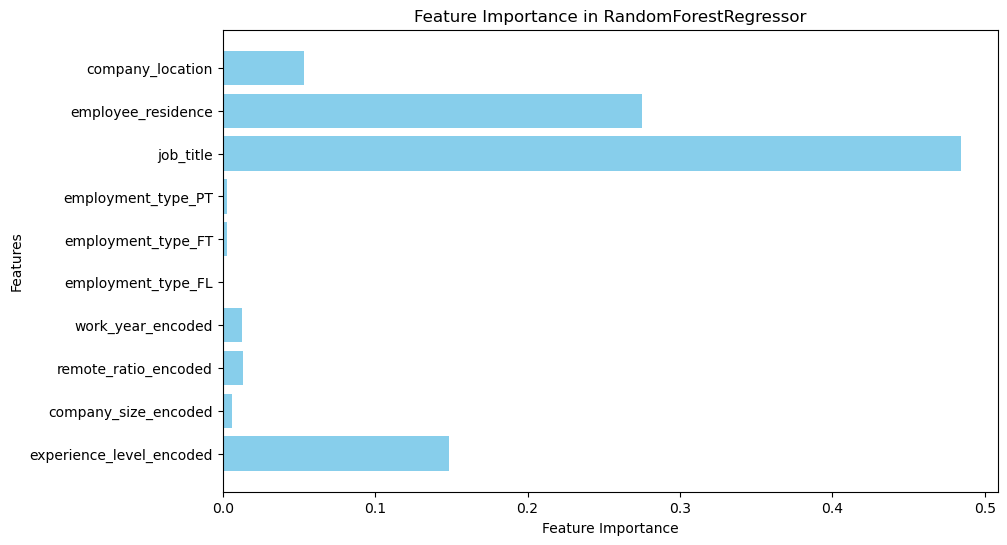

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [1, 2, 5],
}

# Finding the best model for Random Forest algorithm with GridSearchCV.
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters.
print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)

# Performance evaluation of the best model on both test and validation sets.
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print("Validation Set Results:")
print(f"Mean Squared Error (MSE): {mse_val:.2f}")
print(f"R2 Score: {r2_val:.4f}")

y_test_pred = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Test Set Results:")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"R2 Score: {r2_test:.4f}")

feature_importances = best_model.feature_importances_
feature_names = X.columns if hasattr(X, 'columns') else [f"Feature {i}" for i in range(X.shape[1])]
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in RandomForestRegressor")
plt.show()


### XGBoost Regression Model 

In [36]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define parameter grid
param_grid = {
    'max_depth': [6, 8, 10],
    'learning_rate': [0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.8, 1.0]
}

# Perform grid search
grid_search = GridSearchCV(XGBRegressor(objective='reg:squarederror',reg_alpha=0.1,reg_lambda=0.5), 
                           param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 1.0}


In [37]:
best_xgboost = grid_search.best_estimator_
best_xgboost

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Validation Set Results with XGBoost Model:
Mean Squared Error (MSE): 0.12
R2 Score: 0.4258

Test Set Results with XGBoost Model:
Mean Squared Error (MSE): 0.13
R2 Score: 0.4263


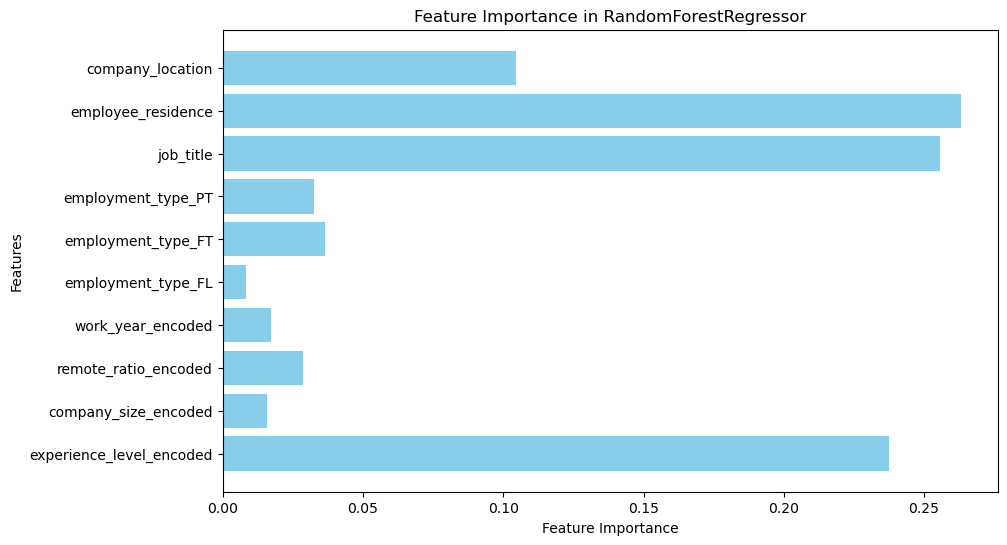

In [38]:
# Predict validation and test data.
y_val_pred = best_xgboost.predict(X_val)
y_test_pred = best_xgboost.predict(X_test)

# Performance Metrics for Validation Data Set.
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

# Performance Metrics for Test Data Set.
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the Results.
print("Validation Set Results with XGBoost Model:")
print(f"Mean Squared Error (MSE): {mse_val:.2f}")
print(f"R2 Score: {r2_val:.4f}\n")

print("Test Set Results with XGBoost Model:")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"R2 Score: {r2_test:.4f}")

# Plotting Features Importances.
feature_importances = grid_search.best_estimator_.feature_importances_
feature_names = X.columns if hasattr(X, 'columns') else [f"Feature {i}" for i in range(X.shape[1])]
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in RandomForestRegressor")
plt.show()


### Linear Regression Model

In [39]:
# Create and train the Linear Regression model
linearRegr = LinearRegression()
linearRegr.fit(X_train, y_train)

# Predict on the test set
y_test_pred = linearRegr.predict(X_test)
y_val_pred = linearRegr.predict(X_val)

# Print results
print("Coefficients:", linearRegr.coef_)
print("Intercept:", linearRegr.intercept_)

# Evaluate the model
print("Test Data Set with Linear Regression")
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Mean Squared Error (MSE):", mse_test)
print("R2 Score:", r2_test)

print("Validation Data Set with Linear Regression")
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print("Mean Squared Error (MSE):", mse_val)
print("R2 Score: ",r2_val)

Coefficients: [ 0.1781399   0.0217729  -0.02040446  0.01582855 -0.33246542  0.1289608
 -0.28066712  0.16642612  0.09080844  0.06298787]
Intercept: 11.202096198689722
Test Data Set with Linear Regression
Mean Squared Error (MSE): 0.1341930567965123
R2 Score: 0.4075854587372555
Validation Data Set with Linear Regression
Mean Squared Error (MSE): 0.12910207739967455
R2 Score:  0.40619399699173186


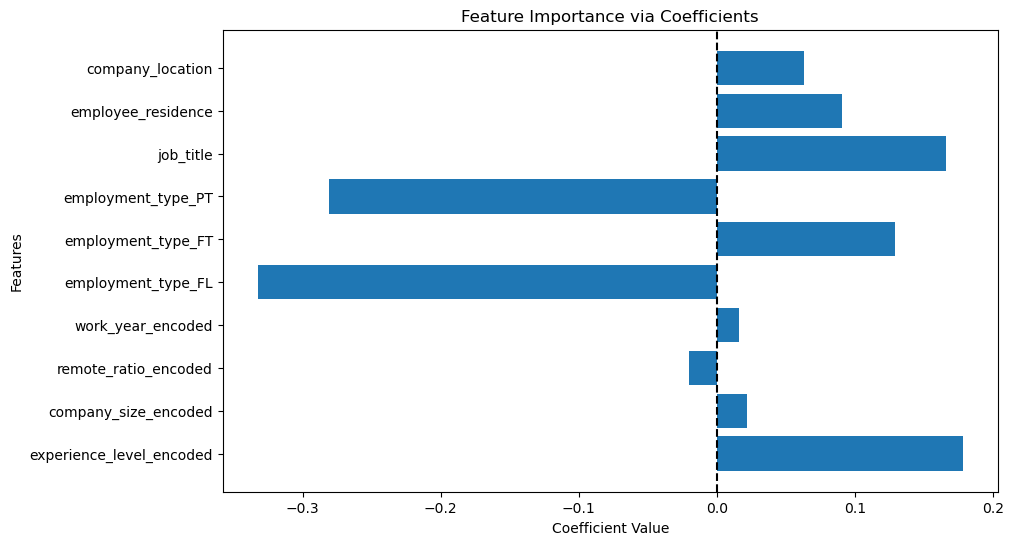

In [40]:
# Get features' names.
feature_names = X_train.columns

# Get coeffients and interception.
coefficients = linearRegr.coef_
intercept = linearRegr.intercept_

plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.title("Feature Importance via Coefficients")
plt.axvline(0, color="black", linestyle="--")  # Negatif ve pozitif ayrımı için
plt.show()


Test Data Set with Polynomial Regression
Mean Squared Error (MSE): 0.13304726670293335
R2 Score: 0.41264371382790654
Validation Data Set with Polynomial Regression
Mean Squared Error (MSE): 0.12757581043082317
R2 Score: 0.41321407371359153
Index(['experience_level_encoded', 'company_size_encoded',
       'remote_ratio_encoded', 'work_year_encoded', 'employment_type_FL',
       'employment_type_FT', 'employment_type_PT', 'job_title',
       'employee_residence', 'company_location'],
      dtype='object')
[ 1.29132970e-01  6.16118707e-01 -3.28730184e-01  3.89360831e-02
  2.58256295e-01 -2.17292668e-01 -1.57432445e-01  5.18226293e-02
  1.19674745e-01 -4.70191633e-02 -3.33791284e-03 -4.47805581e-03
  2.44790630e-02 -2.27806356e-02 -1.10148435e-01  1.26842301e-01
  1.37162817e-01  5.29857419e-03  2.77565415e-03 -1.21314884e-02
 -9.70159675e-02  6.41005061e-03  1.81322888e-03 -3.54020342e-01
 -1.12300337e-01 -3.01118202e-01 -1.94280637e-02  2.85649809e-02
  5.56977158e-04  4.93347254e-02 -8.

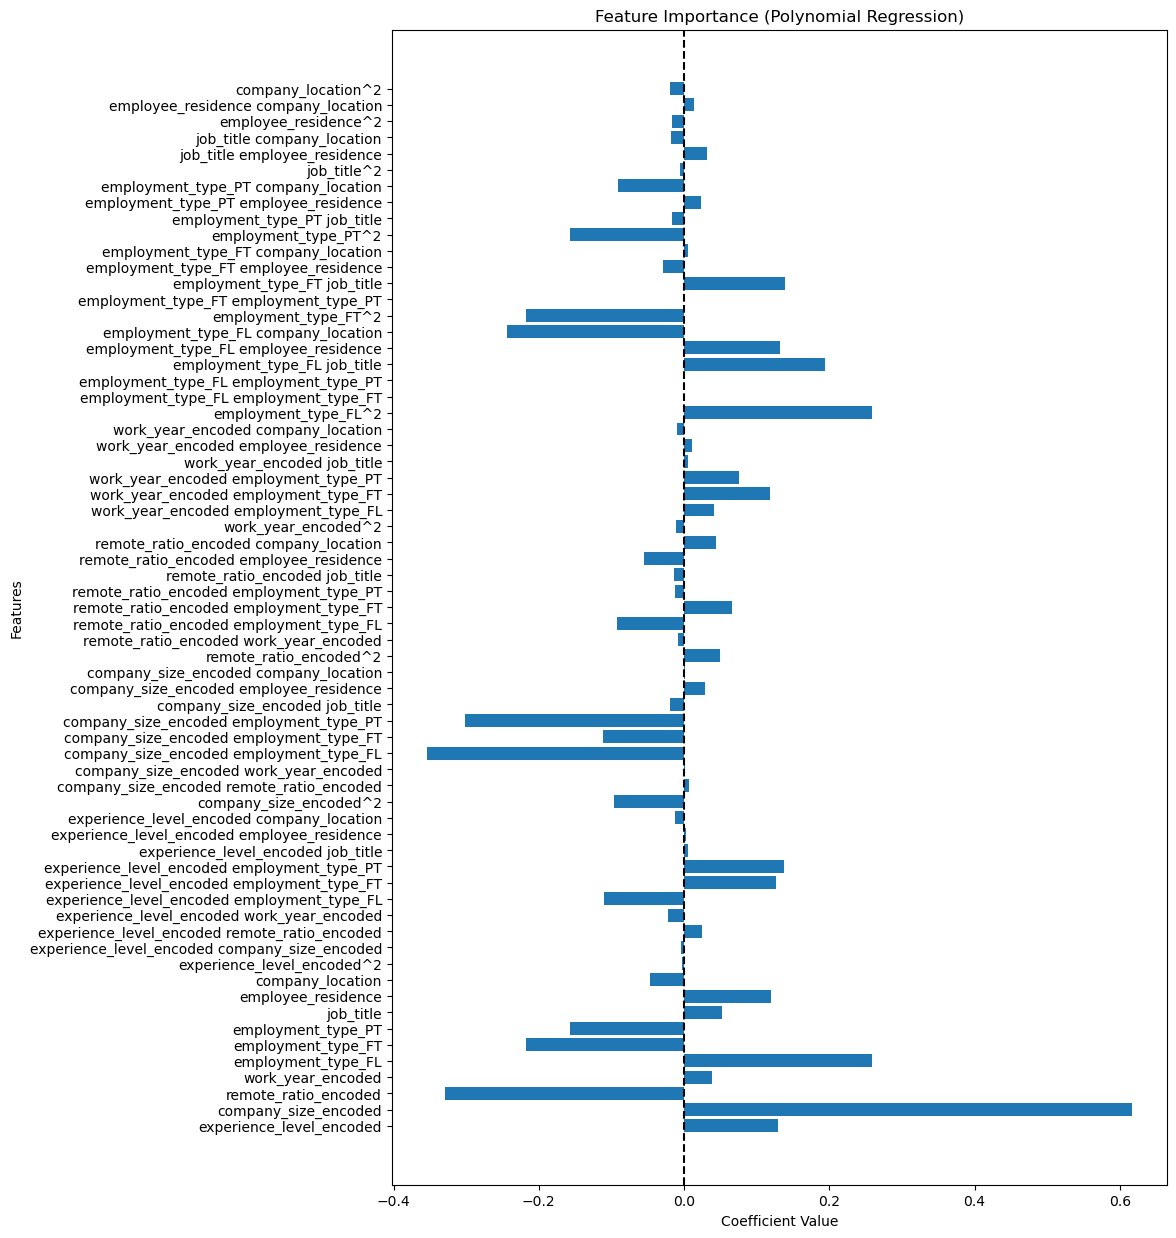

In [41]:
# Generate PolynomailFeatures.
poly = PolynomialFeatures(degree=2, include_bias=False)  # 2. derece polinom
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
X_val_poly = poly.transform(X_val)

# Applying Linear Regression Model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predictions
y_test_pred = model.predict(X_test_poly)
y_val_pred = model.predict(X_val_poly)

poly_feature_names = poly.get_feature_names_out(X_train.columns)

# Evaluate the Model
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Test Data Set with Polynomial Regression")
print("Mean Squared Error (MSE):", mse_test)
print("R2 Score:", r2_test)

mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print("Validation Data Set with Polynomial Regression")
print("Mean Squared Error (MSE):", mse_val)
print("R2 Score:", r2_val)

print(feature_names)

# Examine the important features.
coefficients = model.coef_
print(coefficients)

plt.figure(figsize=(10, 15))
plt.barh(poly_feature_names, coefficients)
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.title("Feature Importance (Polynomial Regression)")
plt.axvline(0, color="black", linestyle="--")
plt.show()

## Results
- Discuss the results here. You can discuss the results with respect to algorithms'/models' performance as well as you can give some reason why that algorithm/model performed better than the others. 
- Any further results can be discussed here.

We used mean squared error and r2 score as probabilistic metrics to evaluate the 3 models we selected. The results we obtained are below:

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Model R2 Scores</title>
    <style>
        table {
            width: 50%;
            border-collapse: separate;
            border-spacing: 0;
            margin: 20px auto;
            font-family: Arial, sans-serif;
            border: 2px solid #000;
        }
        th, td {
            border: 1px solid #000;
            padding: 8px;
            text-align: center;
        }
        th {
            background-color: #f4f4f4;
            font-weight: bold;
        }
        tr:nth-child(even) {
            background-color: #f9f9f9;
        }
        tr:hover {
            background-color: #f1f1f1;
        }
    </style>
</head>
<body>
    <table>
        <thead>
            <tr>
                <th>Model</th>
                <th>Dataset</th>
                <th>Mean Squared Error (MSE)</th>
                <th>R2 Score</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td rowspan="2">Random Forest</td>
                <td>Validation Set</td>
                <td>0.13</td>
                <td>0.4016</td>
            </tr>
            <tr>
                <td>Test Set</td>
                <td>0.13</td>
                <td>0.3874</td>
            </tr>
            <tr>
                <td rowspan="2">XGBoost</td>
                <td>Validation Set</td>
                <td>0.13</td>
                <td>0.4299</td>
            </tr>
            <tr>
                <td>Test Set</td>
                <td>0.13</td>
                <td>0.4138</td>
            </tr>
            <tr>
                <td rowspan="2">Linear Regression</td>
                <td>Validation Set</td>
                <td>0.131793139401511</td>
                <td>0.395769204634672</td>
            </tr>
            <tr>
                <td>Test Set</td>
                <td>0.13058168889628524</td>
                <td>0.4002940626449054</td>
            </tr><tr>
                <td rowspan="2">Polynomial Regression</td>
                <td>Validation Set</td>
                <td>0.1312272230885612</td>
                <td>0.3983637559552998</td>
            </tr>
            <tr>
                <td>Test Set</td>
                <td>0.13017017700000907</td>
                <td>0.4021839610646225</td>
            </tr>
            </tr>
        </tbody>
    </table>
</body>
</html>

When we examine all the models, we see that they all give similar results according to the r2 score. If we have to choose a model, it would probably be XGBoost because it is the model that gives the best performance according to the test score.

However, all 3 models could not produce a high score. In other words, it cannot be said that the models worked very well. There are various reasons for this. For example, all our feature mostly consisted of categorical data. In addition to this, these features did not contain many distinguishing categories. For these reasons, we think that is an expected situation to get low performances from the model. 

## Conclusion
- Give a summary of your project and make a conclusion.

#### Step 1: Reading the Dataset
We started by reading our dataset using the `pandas` library, which allowed us to efficiently handle and analyze tabular data.

#### Step 2: Examining Data Types and Counts
We examined the data types and counts of our dataset columns to gain a better understanding of the structure and completeness of the data.

#### Step 3: Visualizing the Data
To make the dataset more comprehensible, we visually displayed the data using graphs. These visualizations helped us draw meaningful inferences from the data.

#### Step 4: Handling Missing and Outlier Data
We performed checks for missing and outlier data, ensuring the dataset was clean and ready for analysis.

#### Step 5: Encoding Categorical Data
We converted categorical data into numerical values using encoding techniques. Multiple encoding methods were applied to suit the dataset's characteristics.

#### Step 6: Model Application
We applied the following four models to our dataset:

- Random Forest
- XGBoost
- Linear Regression
- Polynomial Regression

The results of each model were displayed separately in a table for comparison.


## Work Distribution
- Tell us about the distribution of work among the team members. Please state the contribution with a percentage.

- Data Set Introduction.
- Data Exploration.
- Data Preparation.
- Feature Engineering.
- Modeling:
    - Random Forest Model. Serkan İşleyen, %100.
    - XGBoost Model. Ecem Erdoğan, %100.
    - Logistic Regresion Model. 
- Preparing Presentation.
- Making the Presentation.
During this project, the two of us worked together from the beginning. The only thing we are working on separately is mentioned above in the modeling section for Random Forest and XGBoost models.

## References

- The dataset used during this project is referenced by https://aijobs.net/salaries/download/
- We learnt the details of Target encoding thanks to https://towardsdatascience.com/encoding-categorical-variables-a-deep-dive-into-target-encoding-2862217c2753

## Additional Folders

If this document involves datasets and images, please keep them in datasets and img folders, respectively. Please, be sure that your project is REPRODUCIBLE. Otherwise, it may not be graded.